Consider the [Bertrand paradox](https://en.wikipedia.org/wiki/Bertrand_paradox_(probability)).

For each of the three cases generate a sample of 100 elements (chords) and compute the ratio of the chords bigger than the side of the equilateral triangle inscribed in the circle.

The circle radius is equal with 1 and the set of chords will contain the cartesian coordinates of the edges of the chords. The origin of the coordinate system is in the origin of the circle.

Draw using matplotlib each set of chords for each case respectively.



In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
R = 1

def draw_circle():
    """Draw the unit circle"""
    theta = np.linspace( 0 , 2 * np.pi , 200 )

    a = np.cos( theta )
    b = np.sin( theta )

    figure, axes = plt.subplots( 1 )

    axes.plot( a, b )
    axes.set_aspect( 1 )

In [15]:
def draw_triangle():
    """Draw the triangle"""
    x = np.array([0,2*np.pi/3,4*np.pi/3,0])
    y = np.array([0,2*np.pi/3,4*np.pi/3,0])
    x = np.cos(x)
    y = np.sin(y)
    plt.plot( x, y, color='red' )

In [22]:
def first_case():
    draw_circle()
    draw_triangle()

    plt.title("Case 1")
    count = 0

    for i in range(N):
        theta1 = np.random.rand() * (2 * np.pi)
        theta2 = np.random.rand() * (2 * np.pi)
        #the 2 new points
        x1, y1 = R * np.cos(theta1), R * np.sin(theta1)
        x2, y2 = R * np.cos(theta2), R * np.sin(theta2)
        #draw the chord
        plt.plot([x1, x2], [y1, y2], color='green')
        chord_length = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        if chord_length > np.sqrt(3) * R:
            count += 1
    plt.show()
    print("Ratio for case 1: ", count/N)


In [23]:
def second_case():
    draw_circle()
    draw_triangle()

    plt.title("Case 2")
    count = 0

    for i in range(N):
        #Choose a radius of the circle
        radius_angle = np.random.rand() * 2 * np.pi
        radius_point =  R * np.array([np.cos(radius_angle), np.sin(radius_angle)])

        #Choose a point on the radius
        random_point = radius_point * np.random.rand()

        #Construct the chord through this point and perpendicular to the radius
        perpendicular_vector = np.array([radius_point[1], -radius_point[0]])
        perpendicular_vector /= np.linalg.norm(perpendicular_vector)

        random_point2 = np.linalg.norm(random_point)
        perpendicular2 = np.sqrt(R ** 2 - random_point2 ** 2)

        chord = np.array([random_point - perpendicular_vector * perpendicular2, random_point + perpendicular_vector * perpendicular2])
        chord_length = np.linalg.norm(chord[0] - chord[1])
        if chord_length > np.sqrt(3) * R:
            count += 1
        plt.plot(chord[:, 0], chord[:, 1], color="green")

    plt.show()
    print("Ratio for case 2:", count/N)

In [16]:
def third_case():
    draw_circle()
    draw_triangle()
    plt.title("Case 3")
    count = 0

    for i in range(N):
        #Choose a point anywhere within the circle
        random_point_r = np.sqrt(np.random.rand()) * R
        random_point_angle = np.random.rand() * 2 * np.pi
        random_point = random_point_r * np.array([np.cos(random_point_angle), np.sin(random_point_angle)])

        #Construct chord with the chosen point as its midpoint.
        perpendicular_vector = np.array([random_point[1], -random_point[0]])
        perpendicular_vector /= np.linalg.norm(perpendicular_vector)
        perpendicular2 = np.sqrt(R ** 2 - random_point_r ** 2)

        chord = np.array([random_point - perpendicular_vector * perpendicular2, random_point + perpendicular_vector * perpendicular2])
        plt.plot(chord[:, 0], chord[:, 1], color="green")
        chord_length = np.linalg.norm(chord[0] - chord[1])
        if chord_length > np.sqrt(3) * R:
            count += 1
    plt.show()
    print("Ratio for case 3:", count/N)

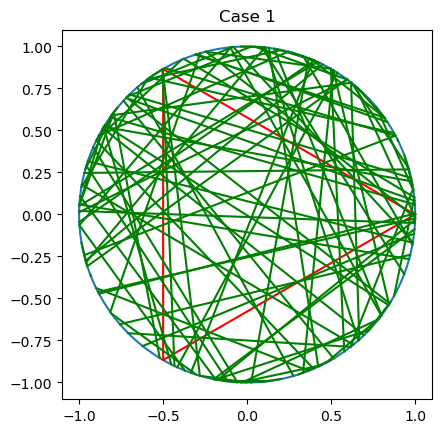

Ratio for case 1:  0.32


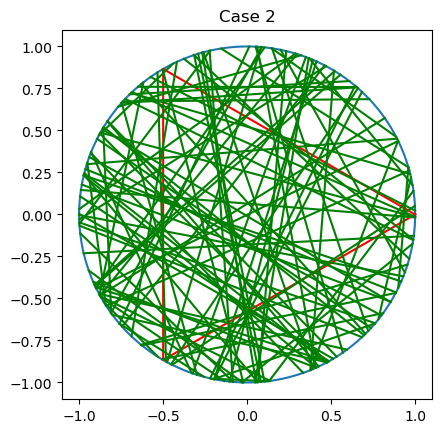

Ratio for case 2: 0.57


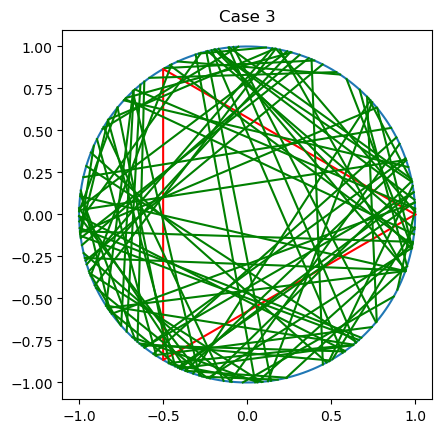

Ratio for case 3: 0.35


In [24]:
first_case()
second_case()
third_case()